### **[미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발**


### ▣ 학습 데이터셋의 변수  

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
def print_categorical(tgt, x):
    # 먼저 집계
    table = pd.crosstab(tgt, x)
    print('교차표\n', table)
    print('-' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('기대빈도\n',result[3])

In [68]:
def logistic_regression_pvalue(tgt, x):
    model = sm.Logit(tgt, x)
    result = model.fit(disp=False)
    print(result.pvalues.index[0], "\t", result.pvalues.iloc[0])

In [69]:
data = pd.read_csv("data-comp/train_dataset.csv")
data = data.loc[:,"url_len":]

# <b>Step 1. 데이터 분석하기
---

## <b>Q1. 데이터 단변량 분석하기


In [755]:
data.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [71]:
data['target'] = data['Result_v1'].apply(lambda x: 1 if x == 'malicious' else 0)

In [7]:
data = data.dropna()
data = data.drop_duplicates(keep='first')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3231 non-null   float64
 1   url_num_hyphens_dom      3231 non-null   float64
 2   url_path_len             3231 non-null   float64
 3   url_domain_len           3231 non-null   float64
 4   url_hostname_len         3231 non-null   float64
 5   url_num_dots             3231 non-null   float64
 6   url_num_underscores      3231 non-null   float64
 7   url_query_len            3231 non-null   float64
 8   url_num_query_para       3231 non-null   float64
 9   url_ip_present           3231 non-null   float64
 10  url_entropy              3231 non-null   float64
 11  url_chinese_present      3231 non-null   float64
 12  url_port                 3231 non-null   float64
 13  html_num_tags('iframe')  3231 non-null   float64
 14  html_num_tags('script') 

In [9]:
data.describe()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),target
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,...,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.0,3231.000000
mean,56.121944,0.421232,30.514392,20.511606,20.450944,2.520891,0.285361,4.984215,0.110492,0.060972,...,8.659239,0.019189,0.030641,69.792943,0.998143,1.016404,0.993810,63.254101,0.0,0.499845
std,86.569208,0.861582,82.670398,9.872364,9.902215,1.562163,1.169914,26.287905,0.599162,0.239316,...,12.769059,0.150140,0.248816,387.505363,0.142934,0.226790,1.574947,360.632590,0.0,0.500077
min,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,2.000000,0.0,0.000000
50%,36.000000,0.000000,13.000000,18.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,32.000000,1.000000,1.000000,1.000000,15.000000,0.0,0.000000
75%,57.000000,1.000000,32.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.000000,0.000000,60.000000,1.000000,1.000000,1.000000,49.000000,0.0,1.000000
max,1837.000000,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,1.000000,...,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0,1.000000


In [10]:
data.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'Result_v1', 'target'],
      dtype='object')

In [83]:
html_tags = ['html_num_tags(\'iframe\')', 'html_num_tags(\'script\')', 'html_num_tags(\'embed\')',
       'html_num_tags(\'object\')', 'html_num_tags(\'div\')',
       'html_num_tags(\'head\')', 'html_num_tags(\'body\')',
       'html_num_tags(\'form\')', 'html_num_tags(\'a\')',
       'html_num_tags(\'applet\')']
html_num_tags = []
for idx, row in data.iterrows():
    html_num_tags += [sum(row[html_tags])]
data['html_num_tags'] = html_num_tags

### **URL 단변량 분석**

In [18]:
# 범주형 변수
print(f"URL IP Present\t\t{data['url_ip_present'].unique()}")
print(f"URL Chinese Present\t{data['url_chinese_present'].unique()}") # 필요 없는 변수
print(f"URL Port\t\t{data['url_port'].unique()}")
print(f"Result\t\t\t{data['Result_v1'].unique()}")

URL IP Present		[0. 1.]
URL Chinese Present	[0.]
URL Port		[0. 1.]
Result			['malicious' 'benign']


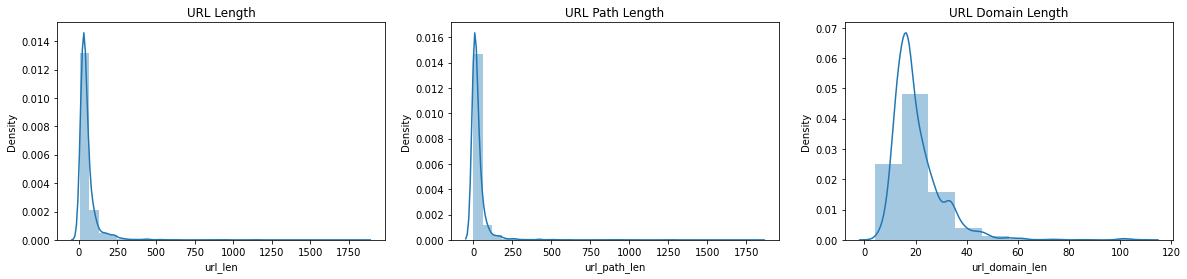

In [19]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.title("URL Length")
sns.distplot(data['url_len'], hist = True, bins=30)

plt.subplot(1, 3, 2)
plt.title("URL Path Length")
sns.distplot(data['url_path_len'], hist = True, bins=30)

plt.subplot(1, 3, 3)
plt.title("URL Domain Length")
sns.distplot(data['url_domain_len'], hist = True, bins=10)

plt.show()

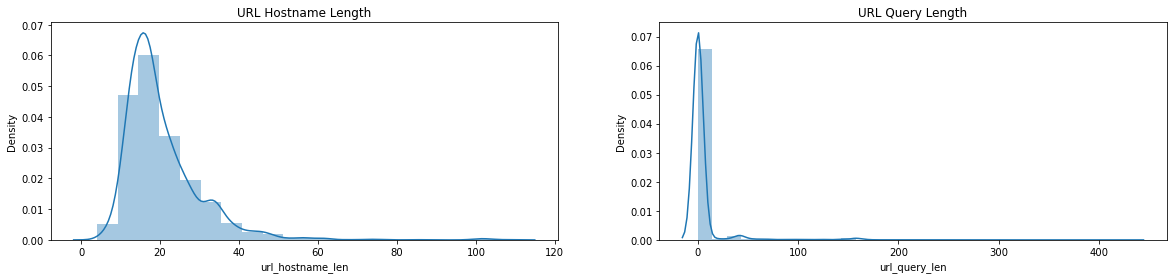

In [20]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title("URL Hostname Length")
sns.distplot(data['url_hostname_len'], hist = True, bins=20)

plt.subplot(1, 2, 2)
plt.title("URL Query Length")
sns.distplot(data['url_query_len'], hist = True, bins=30)

plt.show()

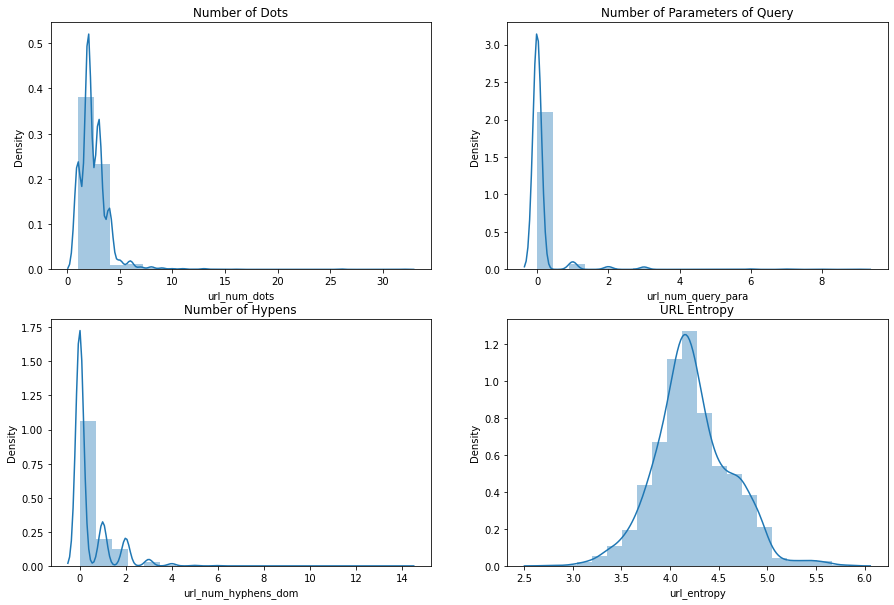

In [21]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Number of Dots")
sns.distplot(data['url_num_dots'],hist = True, bins=20)

plt.subplot(2, 2, 2)
plt.title("Number of Parameters of Query")
sns.distplot(data['url_num_query_para'], hist = True, bins=20)

plt.subplot(2, 2, 3)
plt.title("Number of Hypens")
sns.distplot(data['url_num_hyphens_dom'], hist = True, bins=20)

plt.subplot(2, 2, 4)
plt.title("URL Entropy")
sns.distplot(data['url_entropy'], hist = True, bins=20)

plt.show()

In [22]:
print("Number of Dots Unique value: ", data['url_num_dots'].unique())
print("Number of Parameters Unique value: ", data['url_num_query_para'].unique())
print("Number of Hypens Unique value: ", data['url_num_hyphens_dom'].unique())

Number of Dots Unique value:  [ 2.  6.  3.  4.  1.  9.  5. 32. 10.  7.  8. 11. 13. 12. 26. 14. 16.]
Number of Parameters Unique value:  [0. 1. 2. 3. 6. 7. 4. 9. 8.]
Number of Hypens Unique value:  [ 0.  2.  1.  3.  4.  6.  5. 14.]


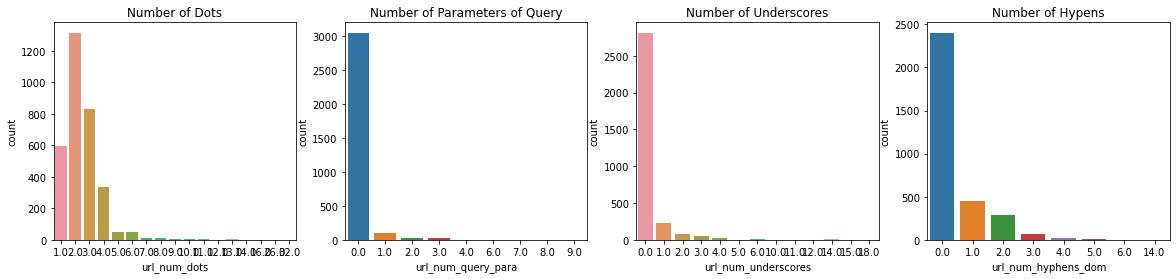

In [23]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.title("Number of Dots")
sns.countplot(data['url_num_dots'])

plt.subplot(1, 4, 2)
plt.title("Number of Parameters of Query")
sns.countplot(data['url_num_query_para'])

plt.subplot(1, 4, 3)
plt.title("Number of Underscores")
sns.countplot(data['url_num_underscores'])

plt.subplot(1, 4, 4)
plt.title("Number of Hypens")
sns.countplot(data['url_num_hyphens_dom'])

plt.show()

### **HTML Tag 단변량 분석**

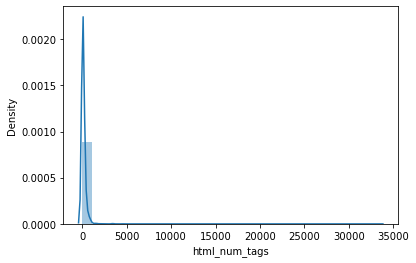

In [26]:
sns.distplot(data["html_num_tags"],hist = True, bins=30)
plt.show()

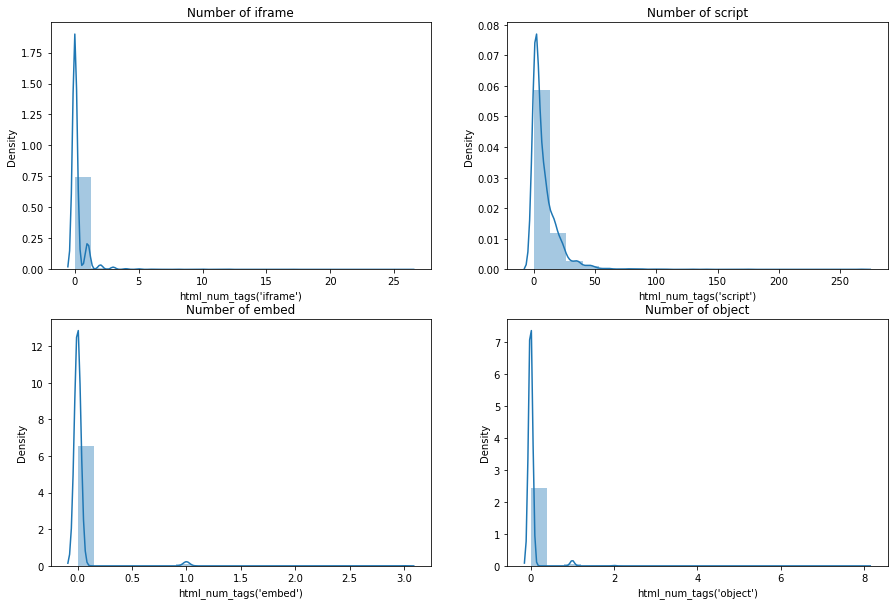

In [27]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Number of iframe")
sns.distplot(data["html_num_tags('iframe')"],hist = True, bins=20)

plt.subplot(2, 2, 2)
plt.title("Number of script")
sns.distplot(data["html_num_tags('script')"],hist = True, bins=20)

plt.subplot(2, 2, 3)
plt.title("Number of embed")
sns.distplot(data["html_num_tags('embed')"],hist = True, bins=20)

plt.subplot(2, 2, 4)
plt.title("Number of object")
sns.distplot(data["html_num_tags('object')"],hist = True, bins=20)

plt.show()

In [28]:
print("embed Tag Unique value: ", data["html_num_tags('embed')"].unique())
print("object Tag Unique value: ", data["html_num_tags('object')"].unique())
print("iframe Tag Unique value: ", data["html_num_tags('iframe')"].unique())

embed Tag Unique value:  [0. 1. 3.]
object Tag Unique value:  [0. 1. 2. 3. 8. 4. 5.]
iframe Tag Unique value:  [ 0.  1.  3.  2. 12.  6.  4. 11.  5. 26. 17.  8. 10.  7.]


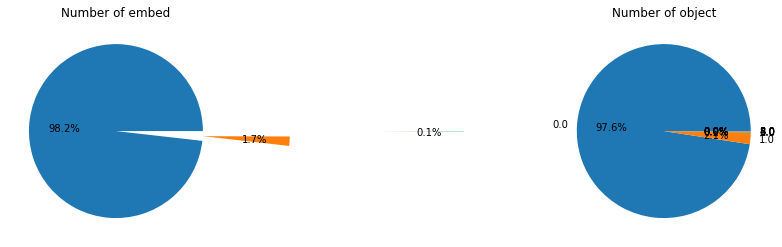

In [29]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.title("Number of embed")
# sns.countplot(data["html_num_tags('embed')"])
embed = data["html_num_tags('embed')"].value_counts()
plt.pie(embed.values, embed.index, autopct='%.1f%%')

plt.subplot(1, 2, 2)
plt.title("Number of object")
ob = data["html_num_tags('object')"].value_counts()
plt.pie(ob.values, labels = ob.index, autopct = '%.1f%%')

# plt.subplot(1, 3, 3)
# plt.title("Number of iframe")
# sns.countplot(data["html_num_tags('iframe')"])


plt.show()

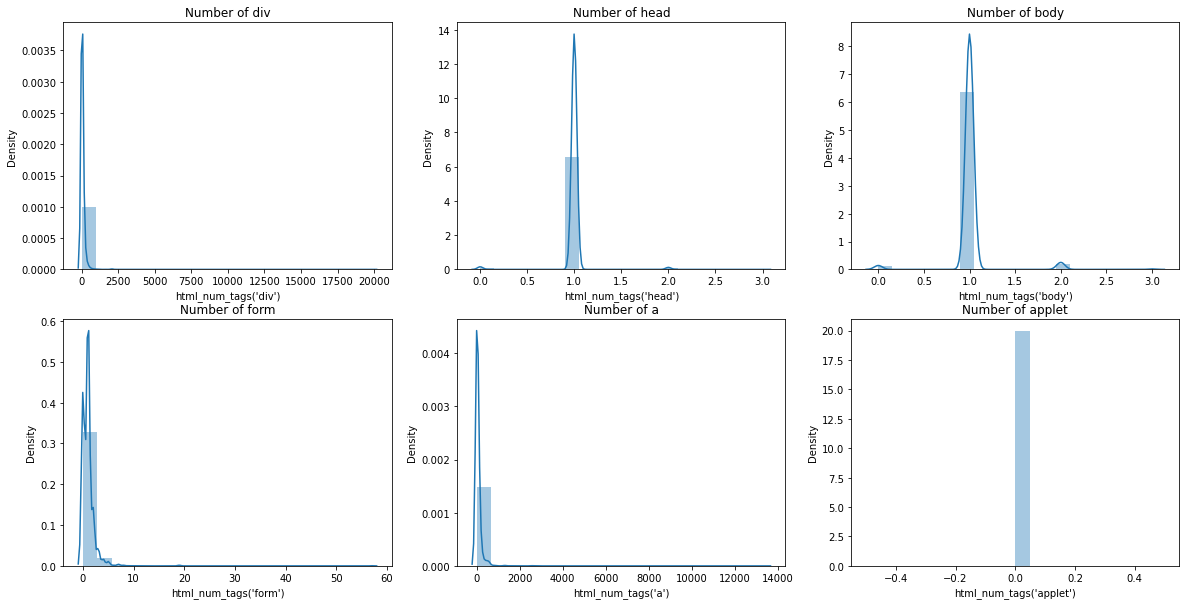

In [30]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title("Number of div")
sns.distplot(data["html_num_tags('div')"],hist = True, bins=20)

plt.subplot(2, 3, 2)
plt.title("Number of head")
sns.distplot(data["html_num_tags('head')"],hist = True, bins=20)

plt.subplot(2, 3, 3)
plt.title("Number of body")
sns.distplot(data["html_num_tags('body')"],hist = True, bins=20)

plt.subplot(2, 3, 4)
plt.title("Number of form")
sns.distplot(data["html_num_tags('form')"],hist = True, bins=20)

plt.subplot(2, 3, 5)
plt.title("Number of a")
sns.distplot(data["html_num_tags('a')"],hist = True, bins=20)

plt.subplot(2, 3, 6)
plt.title("Number of applet")
sns.distplot(data["html_num_tags('applet')"],hist = True, bins=20)

plt.show()

In [31]:
print("head Tag Unique value: ", data["html_num_tags('head')"].unique())
print("body Tag Unique value: ", data["html_num_tags('body')"].unique())
print("applet Tag Unique value: ", data["html_num_tags('applet')"].unique())

head Tag Unique value:  [1. 0. 3. 2.]
body Tag Unique value:  [1. 2. 0. 3.]
applet Tag Unique value:  [0.]


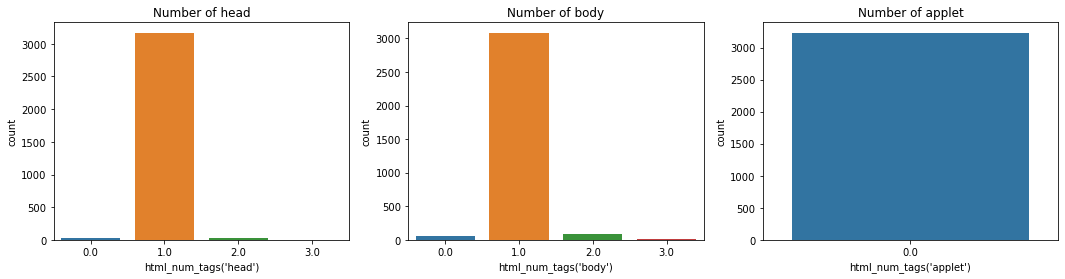

In [32]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Number of head")
sns.countplot(data["html_num_tags('head')"])

plt.subplot(1, 3, 2)
plt.title("Number of body")
sns.countplot(data["html_num_tags('body')"])

plt.subplot(1, 3, 3)
plt.title("Number of applet")
sns.countplot(data["html_num_tags('applet')"])

plt.show()

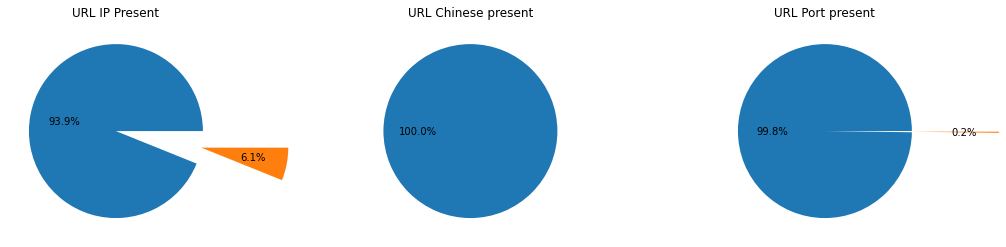

In [33]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("URL IP Present")
url_ip_present = data["url_ip_present"].value_counts()
plt.pie(url_ip_present.values, url_ip_present.index, autopct='%.1f%%')
# sns.countplot(data["url_ip_present"])

plt.subplot(1, 3, 2)
plt.title("URL Chinese present")
url_chinese_present = data["url_chinese_present"].value_counts()
plt.pie(url_chinese_present.values, url_chinese_present.index, autopct='%.1f%%')
# sns.countplot(data["url_chinese_present"])

plt.subplot(1, 3, 3)
plt.title("URL Port present")
url_port = data["url_port"].value_counts()
plt.pie(url_port.values, url_port.index, autopct='%.1f%%')
# sns.countplot(data["url_port"])

plt.show()

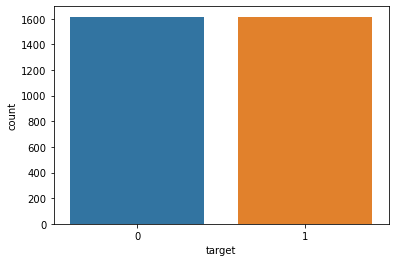

In [369]:
sns.countplot(data['target'])
plt.show()

### **데이터 분포가 고르지 않은 변수들**  
- url_chinese_present
- url_num_query_para
- html_num_tags('object')
- html_num_tags('embed')
- html_num_tags('head')
- html_num_tags('body')
- html_num_tags('applet')

----

## <b>Q2. 데이터 이변량 분석하기

    

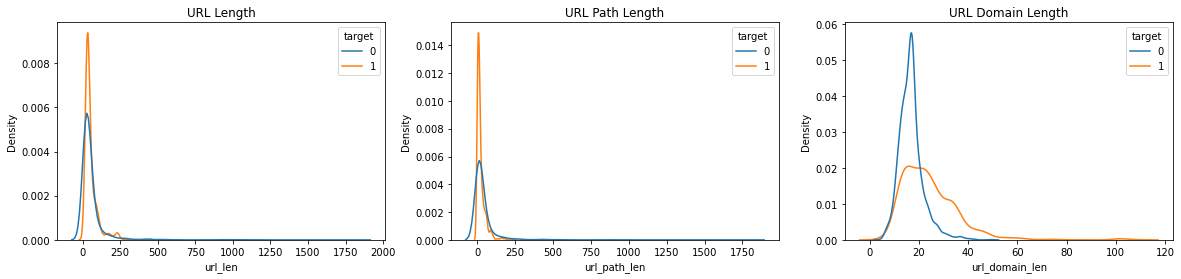

In [34]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.title("URL Length")
sns.kdeplot(x='url_len', data = data, hue = 'target')

plt.subplot(1, 3, 2)
plt.title("URL Path Length")
sns.kdeplot(x='url_path_len', data = data, hue = 'target')

plt.subplot(1, 3, 3)
plt.title("URL Domain Length")
sns.kdeplot(x='url_domain_len', data = data, hue = 'target')
# 도메인 길이에 따라 차이가 있다
plt.show()

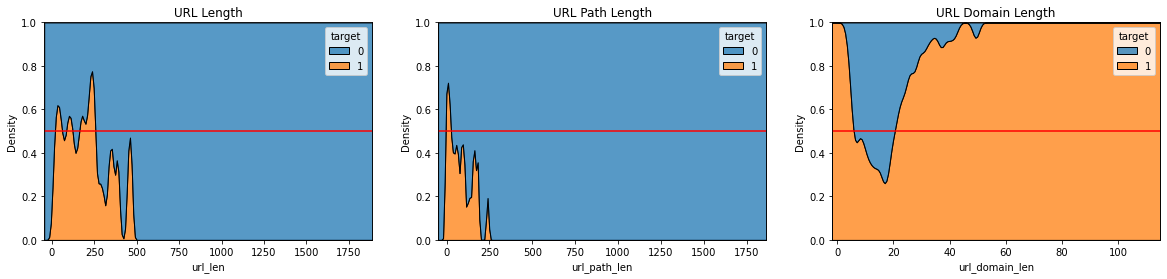

In [35]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.title("URL Length")
sns.kdeplot(x='url_len', data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.subplot(1, 3, 2)
plt.title("URL Path Length")
sns.kdeplot(x='url_path_len', data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.subplot(1, 3, 3)
plt.title("URL Domain Length")
sns.kdeplot(x='url_domain_len', data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.show()

In [67]:
logistic_regression_pvalue(data['target'], data['url_len']) # 관련 없다
logistic_regression_pvalue(data['target'], data['url_path_len'])
logistic_regression_pvalue(data['target'], data['url_domain_len'])

url_len 	 0.7519838165509725
url_path_len 	 2.494151173893036e-09
url_domain_len 	 2.207516466160143e-20


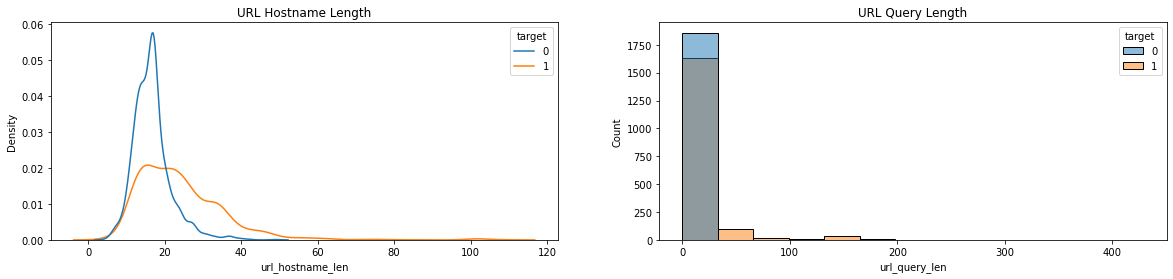

In [72]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title("URL Hostname Length")
sns.kdeplot(x='url_hostname_len', data = data, hue = 'target')
# hostname 길이에 따라 차이 있음

plt.subplot(1, 2, 2)
plt.title("URL Query Length")
sns.histplot(x='url_query_len', data = data, hue = 'target')

plt.show()

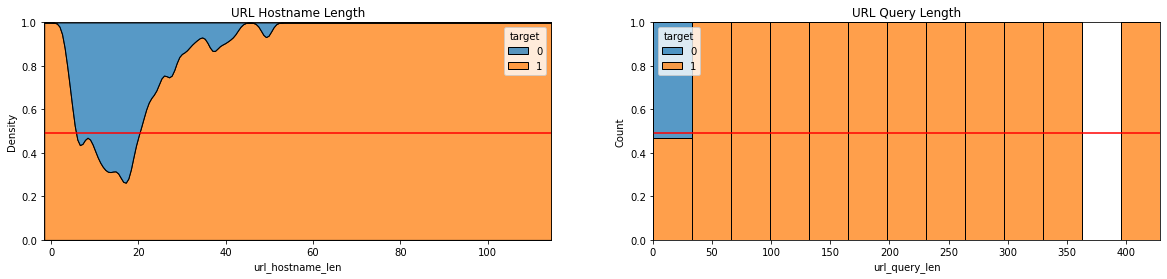

In [73]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title("URL Hostname Length")
sns.kdeplot(x='url_hostname_len', data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.subplot(1, 2, 2)
plt.title("URL Query Length")
sns.histplot(x='url_query_len', data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.show()

In [74]:
logistic_regression_pvalue(data['target'], data['url_hostname_len']) 
logistic_regression_pvalue(data['target'], data['url_query_len'])# 관련 없다

url_hostname_len 	 1.485847044884759e-19
url_query_len 	 0.999579602687051


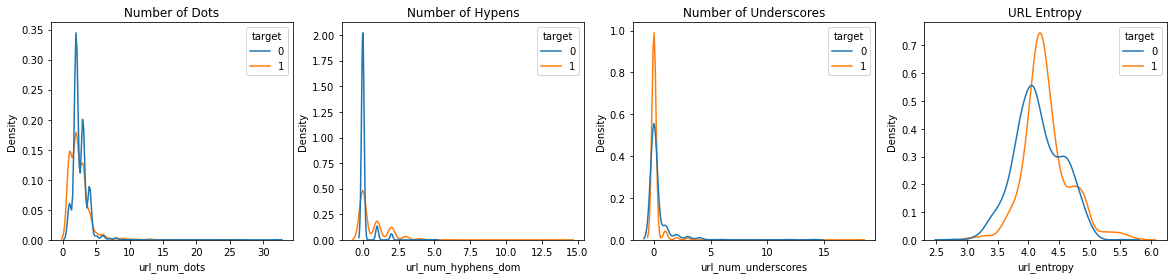

In [75]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.title("Number of Dots")
sns.kdeplot(x='url_num_dots', data = data, hue = 'target')

plt.subplot(1, 4, 2)
plt.title("Number of Hypens")
sns.kdeplot(x='url_num_hyphens_dom', data = data, hue = 'target')

plt.subplot(1, 4, 3)
plt.title("Number of Underscores")
sns.kdeplot(x='url_num_underscores', data = data, hue = 'target')

plt.subplot(1, 4, 4)
plt.title("URL Entropy")
sns.kdeplot(x='url_entropy', data = data, hue = 'target')
# url entropy에 따라 차이가 있다

plt.show()

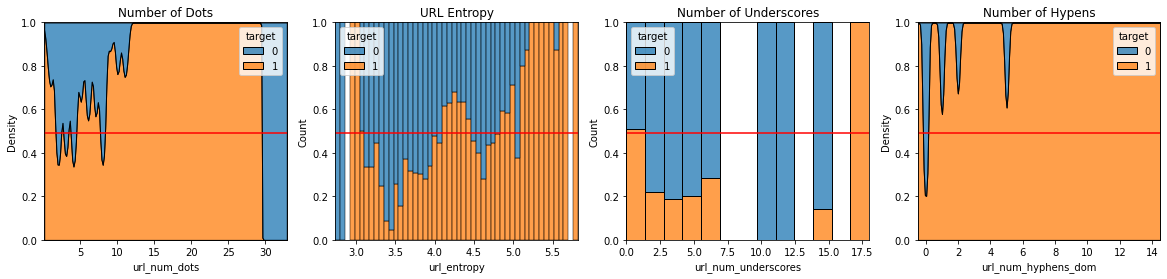

In [76]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.title("Number of Dots")
sns.kdeplot(x='url_num_dots', data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.subplot(1, 4, 2)
plt.title("URL Entropy")
sns.histplot(x='url_entropy', data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.subplot(1, 4, 3)
plt.title("Number of Underscores")
sns.histplot(x='url_num_underscores', data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.subplot(1, 4, 4)
plt.title("Number of Hypens")
sns.kdeplot(x='url_num_hyphens_dom', data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.show()

In [77]:
logistic_regression_pvalue(data['target'], data['url_num_dots']) # 관련 약함
logistic_regression_pvalue(data['target'], data['url_entropy']) # 관련 없다
logistic_regression_pvalue(data['target'], data['url_num_underscores']) 
logistic_regression_pvalue(data['target'], data['url_num_hyphens_dom'])

url_num_dots 	 0.02914689396537477
url_entropy 	 0.9419807684410659
url_num_underscores 	 4.394527443804294e-13
url_num_hyphens_dom 	 1.737920507998754e-61


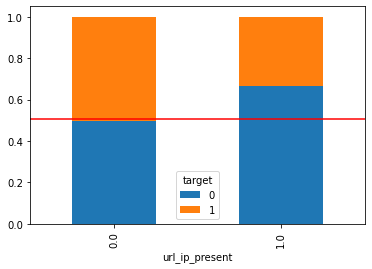

In [78]:
temp = pd.crosstab(data['url_ip_present'], data['target'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['target'].mean(), color = 'r')
plt.show()
# URL에 IP 주소를 포함하고 있는 경우 악성일 경우가 높음

In [79]:
# 굉장히 관련이 있음
print_categorical(data['target'], data['url_ip_present'])

교차표
 url_ip_present   0.0  1.0
target                   
0               1710  148
1               1731   75
----------------------------------------------------------------------------------------------------
카이제곱통계량 22.629448734296957
p-value 1.9645029354744843e-06
기대빈도
 [[1744.91757642  113.08242358]
 [1696.08242358  109.91757642]]


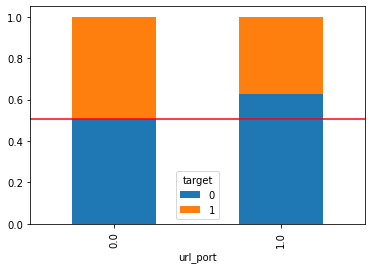

In [80]:
temp = pd.crosstab(data['url_port'], data['target'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['target'].mean(), color = 'r')
plt.show()
# Port를 표기하는 경우 악성일 확률이 높음

In [81]:
# 관련 약함
print_categorical(data['target'], data['url_port'])

교차표
 url_port   0.0  1.0
target             
0         1853    5
1         1803    3
----------------------------------------------------------------------------------------------------
카이제곱통계량 0.0984618258872073
p-value 0.7536833698526882
기대빈도
 [[1853.94323144    4.05676856]
 [1802.05676856    3.94323144]]


### **HTML Tag 이변량 분석**

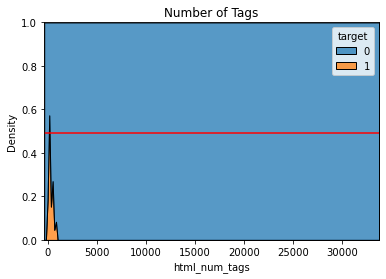

In [84]:
plt.title("Number of Tags")
sns.kdeplot(x="html_num_tags", data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')
plt.show()

In [85]:
logistic_regression_pvalue(data['target'], data["html_num_tags"]) # 관련 있음

html_num_tags 	 1.2854348281368358e-31


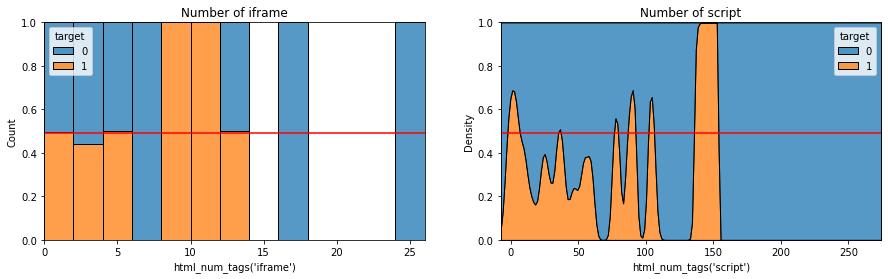

In [86]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.title("Number of iframe")
sns.histplot(x="html_num_tags('iframe')", data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.subplot(1, 2, 2)
plt.title("Number of script")
sns.kdeplot(x="html_num_tags('script')", data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.show()

In [87]:
logistic_regression_pvalue(data['target'], data["html_num_tags('iframe')"]) # 관련 약함
logistic_regression_pvalue(data['target'], data["html_num_tags('script')"])

html_num_tags('iframe') 	 0.14613605783587158
html_num_tags('script') 	 1.2118663461591837e-24


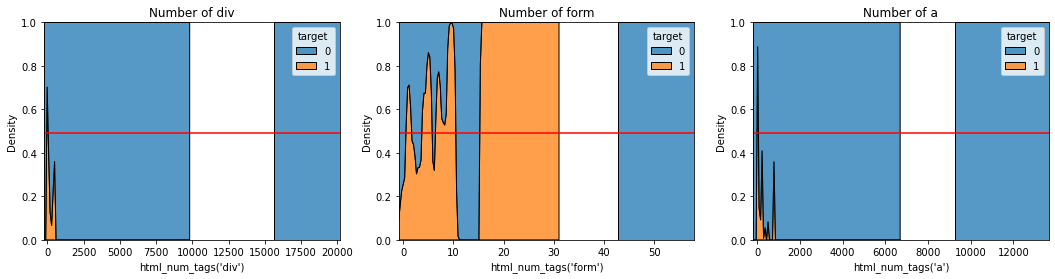

In [88]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Number of div")
sns.kdeplot(x="html_num_tags('div')", data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.subplot(1, 3, 2)
plt.title("Number of form")
sns.kdeplot(x="html_num_tags('form')", data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.subplot(1, 3, 3)
plt.title("Number of a")
sns.kdeplot(x="html_num_tags('a')", data = data, hue = 'target', multiple='fill')
plt.axhline(data['target'].mean(), color = 'r')

plt.show()

In [89]:
logistic_regression_pvalue(data['target'], data["html_num_tags('div')"]) 
logistic_regression_pvalue(data['target'], data["html_num_tags('form')"])
logistic_regression_pvalue(data['target'], data["html_num_tags('a')"])

html_num_tags('div') 	 3.4215126295196744e-12
html_num_tags('form') 	 3.1664218358492034e-09
html_num_tags('a') 	 2.8975295114683237e-39


In [90]:
logistic_regression_pvalue(data['target'], data["url_num_query_para"])  # 관련 없음
logistic_regression_pvalue(data['target'], data["html_num_tags('object')"])
logistic_regression_pvalue(data['target'], data["html_num_tags('embed')"]) 
logistic_regression_pvalue(data['target'], data["html_num_tags('head')"]) # 관련 없음
logistic_regression_pvalue(data['target'], data["html_num_tags('body')"]) # 관련 없음

url_num_query_para 	 0.9940584838341294
html_num_tags('object') 	 4.489999365717731e-09
html_num_tags('embed') 	 3.335171979873888e-07
html_num_tags('head') 	 0.5229424184382383
html_num_tags('body') 	 0.536099701822767


### **제거할 변수들**

**의미 없는 변수들**    
- `Result_v1`, `url_chinese_present`, `html_num_tags('applet')`


**데이터 분포가 고르지 않은 변수**    
- `html_num_tags('object')`, `html_num_tags('embed')`, `url_num_query_para`, `html_num_tags('head')`, `html_num_tags('body')`, `url_port`  

**Target과 낮은 상관관계를 보이는 변수**
- `url_num_query_para`, `html_num_tags('head')`, `html_num_tags('body')`, `url_port`, `url_len`, `url_query_len`, `url_num_dots`,`url_entropy`
